## Supervised Learning 2: Training and Testing

### Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Previously, we considered Gay-Lussac's law for linear regression,
$$ P\varpropto T $$.

Here we will generate the dataset using the same function,

In [2]:
def GayLussac(m, slope, intercept):
    '''
    Parameters: 
    T: Temperature in K; P: Pressure in kPa; m: No. of data Points; slope; intercept; noise
    The noise is selected randomly from a normal distribution.
    Returns:
    m number of P,T pairs with P = slope*T +intercept + noise
    '''
    np.random.seed(123)
    T = np.random.uniform(200,3000, m)
    T.sort()
    noise = np.random.normal(0, 100, m) 
    P = slope * T + intercept + noise
    T = T.reshape(m,1)
    P = P.reshape(m,1)
    return T,P, noise

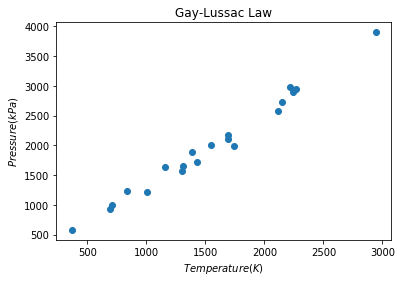

In [3]:
slope = 1.3
intercept = 0.10
T,P, noise = GayLussac(20,slope,intercept)
d = {'Temperature': T[:,0], 'Pressure': P[:,0]}

plt.scatter(T,P)
plt.xlabel('$Temperature (K)$')
plt.ylabel('$Pressure (kPa)$')
plt.title("Gay-Lussac Law")
plt.show()

In [4]:
from sklearn import linear_model
m = len(P)
fit = linear_model.LinearRegression(fit_intercept=True).fit(T,P)
w = fit.coef_
b = fit.intercept_
print('Coefficient: \n', w)
print('Intercept:\n ', b)

Coefficient: 
 [[1.2585773]]
Intercept:
  [45.69461971]


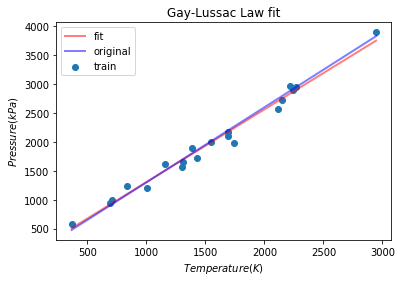

In [5]:
plt.scatter(T, P, label='train')
plt.plot(T, T.dot(w) + b, 'r-', lw=2.0, alpha=0.5, label='fit')
plt.plot(T, T.dot(slope) + intercept, 'b-', lw=2.0, alpha=0.5, label='original')
plt.xlabel('$Temperature (K)$')
plt.ylabel('$Pressure (kPa)$')
plt.legend()
plt.title("Gay-Lussac Law fit")
plt.show()

In the plot above, we have used all the data we have for $P$ and $T$ to determine the relationship between the two. In other words, the whole set is used as the training set. But, to verify the performance of the model, we should define a test set and evaluate the model on those data. We will randomly generate $T$ and $P$ value in the range $200 K< T < 3000 K$ with the same underlying relation

In [6]:
T_1,P_1, noise = GayLussac(5,slope,intercept)# same slope and intercept for the same gas.

We have generated a test set following the same relationship as the training set. We can evaluate how well our linear regression model does for this test set. 

In [7]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
P_pred = fit.predict(T_1)
print("Mean squared error: %.2f"
      % mean_squared_error(P_1, P_pred))
print('r_2 statistic: %.2f' % r2_score(P_1, P_pred))
print("Mean absolute error: %.2f"
      % mean_absolute_error(P_1, P_pred))

Mean squared error: 14451.69
r_2 statistic: 0.97
Mean absolute error: 78.78


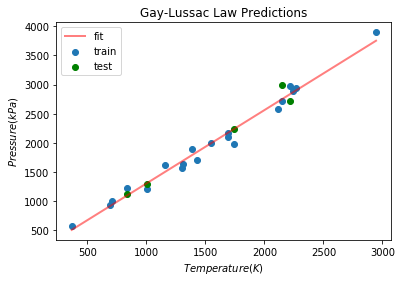

In [8]:
plt.scatter(T, P, label='train')
plt.scatter(T_1,P_1, c='green', label = 'test')
plt.plot(T, T.dot(w) + b, 'r-', lw=2.0, alpha=0.5, label='fit')
#plt.plot(X1, X1.dot(slope) + intercept, 'b-', lw=2.0, alpha=0.5, label='original')
plt.xlabel('$Temperature (K)$')
plt.ylabel('$Pressure (kPa)$')
plt.legend()
plt.title("Gay-Lussac Law Predictions")
plt.show()

As we can see, our model does pretty well in terms of the $R^2$ values and calculated absolute errors. 

Above, we considered a totally separate test set, i.e. a set of data points not originally a part of the trining data. Hence total number of training and testing $T-P$ pairs is $20+5 = 25$. But a more general approach is to divide the total data you have to training set and test set and then perform the training. 

Below we will separate the whole dataset of $20$ points into training set and test set in the ratio (4:1)rather than defining a separate dataset.

In [9]:
from sklearn import model_selection
gen = np.random.RandomState(seed=44)
T_train, T_test, P_train, P_test = model_selection.train_test_split(T, P, test_size=.25,shuffle = True,random_state=gen)

In [10]:
m = len(P_train)
fit_2 = linear_model.LinearRegression(fit_intercept=True).fit(T_train,P_train)
w_1 = fit_2.coef_
b_1 = fit_2.intercept_
print('Coefficient: \n', w_1)
print('Intercept:\n ', b_1)

Coefficient: 
 [[1.28482192]]
Intercept:
  [12.60027765]


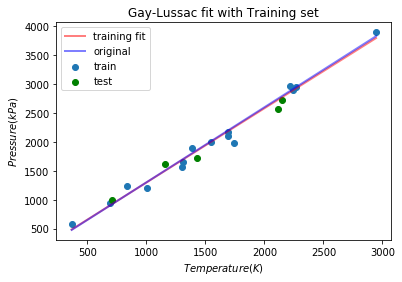

In [11]:
plt.scatter(T_train, P_train, label='train')
plt.scatter(T_test,P_test, c='green', label = 'test')
plt.plot(T, T.dot(w_1) + b_1, 'r-', lw=2.0, alpha=0.5, label='training fit')
plt.plot(T, T.dot(slope) + intercept, 'b-', lw=2.0, alpha=0.5, label='original')
plt.xlabel('$Temperature (K)$')
plt.ylabel('$Pressure (kPa)$')
plt.legend()
plt.title("Gay-Lussac fit with Training set")
plt.show()

What do we see? The training fit resembles the original line that was used to generate the $T-P$ data more than when we used all the 20 training points. Can we expect to see the same if we change the random splitting of the training and test set? what if we further reduce the size of the training set size? 

In the world of ML, none of these questions can have a consistent answer. 


If we check the error on the test set using this model,

In [12]:
P_pred = fit.predict(T_test)
print("Mean squared error: %.2f"
      % mean_squared_error(P_test, P_pred))
print('r_2 statistic: %.2f' % r2_score(P_test, P_pred))
print("Mean absolute error: %.2f"
      % mean_absolute_error(P_test, P_pred))

Mean squared error: 10678.80
r_2 statistic: 0.97
Mean absolute error: 93.71


While the $R^2$ values are conistent for the training set ($0.98$) and the test set ($0.97$) performance in the two types of testing above, the mean squared error and the mean absolute error values are not consistent. From the past exercieses, can you think of the reason behind it?